# Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used for image recognition and processing tasks. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from images.

### Key Components:
- **Convolutional Layers**: Extract features from the input images using filters (**kernels**).
- **Pooling Layers**: Reduce the spatial dimensions of the feature maps, preserving important information and reducing computation.
- **Fully Connected Layers**: Perform classification based on the features extracted from the convolutional layers.

### Applications:
- Image Classification
- Object Detection
- Image Segmentation
- Medical Image Analysis

## Building a Simple CNN
Building a CNN model using the Fashion MNIST dataset, which consists of grayscale images of clothing items, using **TensorFlow** and **Keras** for the implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension (1 for grayscale)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Check the shape of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


The model will consist of:
- Two convolutional layers
- One pooling layer
- One fully connected layer
- An output layer for classification


In [4]:
# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

- The model is built using the `Sequential` API, stacking layers on top of each other.
- `Conv2D` layers apply convolution operations to the input images, extracting features using filters of size 3x3.
- `MaxPooling2D` layers reduce the dimensionality of the feature maps, which helps in reducing overfitting.
- The `Flatten` layer converts the 2D feature maps into a 1D feature vector, preparing it for the fully connected layers.
- The `Dense` layers are added for classification, with the last layer using softmax activation to output probabilities for each of the 10 classes.

In [6]:
# Training
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9417 - loss: 0.1537 - val_accuracy: 0.9083 - val_loss: 0.2633
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9492 - loss: 0.1419 - val_accuracy: 0.9121 - val_loss: 0.2789
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9525 - loss: 0.1283 - val_accuracy: 0.9040 - val_loss: 0.3087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9572 - loss: 0.1148 - val_accuracy: 0.9102 - val_loss: 0.2765
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9597 - loss: 0.1095 - val_accuracy: 0.9116 - val_loss: 0.3022
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9633 - loss: 0.0980 - val_accuracy: 0.9117 - val_loss: 0.3107
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9655 - loss: 0.0919 - val_accuracy: 0.9107 - val_loss: 0.3311
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9671 - loss: 0.0870 - 

### Visualizing Training History

Visualize the training and validation accuracy and loss over each epoch to understand the model's performance.

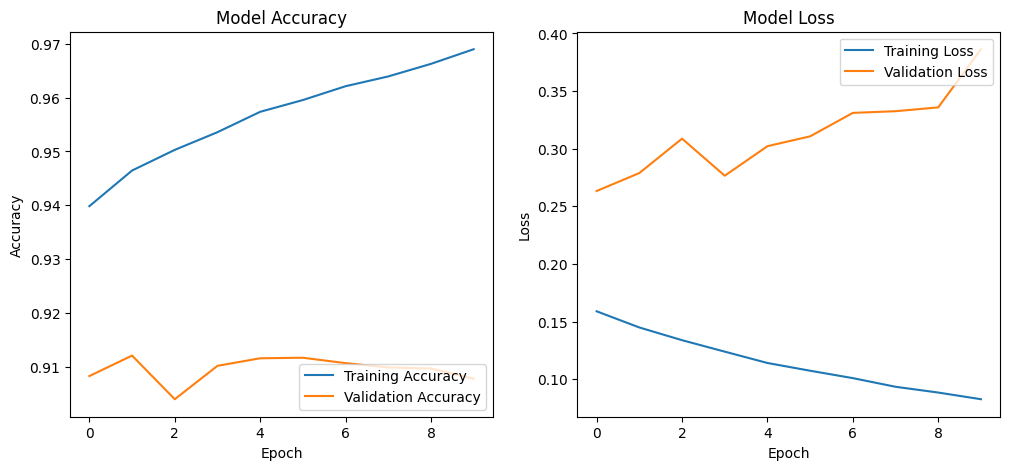

In [7]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

>A good model should show increasing training accuracy and decreasing training loss, with validation metrics closely following the training metrics.

In [10]:
# Evaluate the model on the test data (unseen data)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9043 - loss: 0.4085
Test Accuracy: 90.78%
Test Loss: 0.3863
